# Activity: Explore probability distributions

## **Imports** 

In [2]:
# Import relevant libraries, packages, and modules.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm


In [3]:
# IMPORT DATA.

data = pd.read_csv("modified_c4_epa_air_quality.csv")


## **Data exploration** 

In [4]:
# Display first 10 rows of the data.

data.head(10)


,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910


In [6]:
# Display number of rows, number of columns.

data.shape


(260, 8)

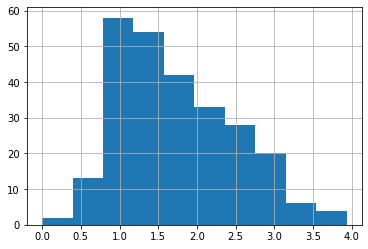

In [5]:
# Create a histogram to visualize distribution of aqi_log.

data['aqi_log'].hist()


The histogram appears to be slightly right skewed but still looks like bell curve /normal distribution

## **Statistical tests**

Use the empirical rule to observe the data, then test and verify that it is normally distributed.


In [6]:
# Define variable for aqi_log mean.

mean_aqi = data['aqi_log'].mean()


# Print out the mean.

mean_aqi


1.7669210929985577

In [7]:
# Define variable for aqi_log standard deviation.

std_aqi = data['aqi_log'].std()


# Print out the standard deviation.

std_aqi


0.7147155520223721

In [10]:
# Define variable for lower limit, 1 standard deviation below the mean.

lower_limit = mean_aqi - 1*std_aqi

# Define variable for upper limit, 1 standard deviation above the mean.

upper_limit = mean_aqi + 1*std_aqi

# Display lower_limit, upper_limit.

print('', lower_limit)
print('', upper_limit)



 1.0522055409761855
 2.48163664502093


In [11]:
# Display the actual percentage of data that falls within 1 standard deviation of the mean.

((data['aqi_log'] >= lower_limit) & (data['aqi_log'] <= upper_limit)).mean()



0.7615384615384615

In [12]:
# Define variable for lower limit, 2 standard deviations below the mean.

lower_limit = mean_aqi - 2*std_aqi




# Define variable for upper limit, 2 standard deviations below the mean.

upper_limit = mean_aqi + 2*std_aqi




# Display lower_limit, upper_limit.

print('', lower_limit)
print('', upper_limit)



 0.33748998895381344
 3.1963521970433018


In [13]:
# Display the actual percentage of data that falls within 2 standard deviations of the mean.
((data['aqi_log'] >= lower_limit) & (data['aqi_log'] <= upper_limit)).mean()




0.9576923076923077

In [14]:
# Define variable for lower limit, 3 standard deviations below the mean.

lower_limit = mean_aqi - 3*std_aqi



# Define variable for upper limit, 3 standard deviations above the mean.

upper_limit = mean_aqi + 3*std_aqi




# Display lower_limit, upper_limit.

print('', lower_limit)
print('', upper_limit)



 -0.3772255630685586
 3.911067749065674


In [15]:
# Display the actual percentage of data that falls within 3 standard deviations of the mean.

((data['aqi_log'] >= lower_limit) & (data['aqi_log'] <= upper_limit)).mean()



0.9961538461538462

## **Results and evaluation** 


    About 76.15% of the data falls within 1 standard deviation of the mean.
    About 95.77% of the data falls within 2 standard deviation of the mean.
    About 99.62% of the data falls within 3 standard deviations of the mean.

The 95.77% is very close to 95%, and the 99.62% is very close to 99.7%. The 76.15% is not as close to 68%, but relatively close. Overall, from applying the empirical rule, the data appears to be not exactly normal, but could be considered approximately normal. 

Z-score could be used to identify values that lie more than 3 standard deviations below or above the mean. These values may be considered outliers.

In [16]:
# Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.

data['z_score'] = stats.zscore(data['aqi_log'])

# Display the first 5 rows to ensure that the new column was added.

data.head()


,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.438109
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.034820
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.936873
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.533584
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.533584


In [17]:
# Display data where `aqi_log` is above or below 3 standard deviations of the mean

data[(data['z_score'] > 3) | (data['z_score'] < -3)]


,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.034886


One outliers where the AQI is above 3 standard deviations of the mean which is WEST PHOENIX. This could mean the air in that area is unhealthy and have unusual pollution

Outlier detection is important because it can reveal two important things:
1. It can identify measurements that were taken incorrectly. 
2. They can highlight parts of the data that can be focused on to make improvements.

## **Considerations**

**Key takeaways**
- Plotting the data using a histogram, then observing the shape, enables you to visually determine whether the data is normally distributed.
- The empirical rule can be used to verify whether a distribution is normal.
- The mean and standard deviation are important measures when applying the empirical rule to a distribution.
- Z-score allows you to identify potential outliers in the data.

**Summary to provide to stakeholders**
- The distribution of the `aqi_log` data is approximately normal.
- Using statistical methods, it was determined that the site at West Phoenix has worse air quality than the other sites. 
- Consider allocating more resources toward further examining this site in order to improve its air quality.